In [0]:
import pickle
import numpy as np

Using Google Colab for training,  next 4 blocks are for uploading the training dataset

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1ajCMiUI6Wv8QdpYmtbcM--U4RTFVH6zq' 

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ajCMiUI6Wv8QdpYmtbcM--U4RTFVH6zq


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('trainimg.pkl')  
# Dataset is now stored in a Pandas Dataframe

Unpickling the dataset

In [0]:
pickle_off = open("trainimg.pkl","rb")
emp = pickle.load(pickle_off)

In [0]:
len(emp[0])

784

Reshaping the list as per image dimensions and displaying an example

In [0]:
x_train=np.array(emp)

In [0]:
x_train=x_train.reshape((8000,28,28,1))

In [0]:
img_tensor=x_train[2]

In [0]:
img_tensor=img_tensor.reshape((28,28))

In [0]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [0]:
from keras.preprocessing import image
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

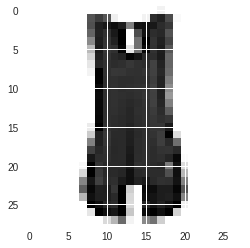

In [0]:
plt.imshow(img_tensor)

Downloading the training labels

In [0]:
link = 'https://drive.google.com/open?id=1CjWhqbqViHgS7ti5dajfiwC36qupwlhw' 

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1CjWhqbqViHgS7ti5dajfiwC36qupwlhw


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('trainlabel.pkl')  
# Dataset is now stored in a Pandas Dataframe

In [0]:
pickle_off = open("trainlabel.pkl","rb")
emp = pickle.load(pickle_off)


In [0]:
y_train=np.array(emp)

In [0]:
y_train.shape

(8000,)

Downloading the test images

In [0]:
link = 'https://drive.google.com/open?id=16rGDv7syd_gR5xIBgHvflMehePTBCDmy' 

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

16rGDv7syd_gR5xIBgHvflMehePTBCDmy


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testimg.pkl')  
# Dataset is now stored in a Pandas Dataframe

In [0]:
pickle_off = open("testimg.pkl","rb")
emp = pickle.load(pickle_off)


In [0]:
len(emp)

2000

In [0]:
x_test=np.array(emp)

In [0]:
x_test=x_test.reshape((2000,28,28,1))

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tempfile, sys, os
sys.path.insert(0, os.path.abspath('..'))

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Changing class values to be able to use to_categorically

In [0]:
np.unique(y_train)

array([0, 2, 3, 6])

In [0]:
y_train[y_train==2]=1

In [0]:
y_train[y_train==3]=2

In [0]:
y_train[y_train==6]=3
    

In [0]:
np.unique(y_train)

array([0, 1, 2, 3])

In [0]:
y_train = keras.utils.to_categorical(y_train, 4)

In [0]:
y_train.shape

(8000, 4)

In [0]:
x_train.shape

(8000, 28, 28, 1)

In [0]:
x_train=x_train/255

In [0]:
x_train = (x_train - 0.5) * 2

In [0]:
x_test=x_test/255

In [0]:
x_test = (x_test - 0.5) * 2

building a simple convolutional module

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax')) 

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train,
          batch_size=25,
          epochs=5,
          verbose=1)

Epoch 1/5
8000/8000 [==============================] - 4s 473us/step - loss: 0.6172 - acc: 0.7456
Epoch 2/5
8000/8000 [==============================] - 3s 425us/step - loss: 0.4374 - acc: 0.8280
Epoch 3/5
8000/8000 [==============================] - 3s 429us/step - loss: 0.3756 - acc: 0.8506
Epoch 4/5
8000/8000 [==============================] - 3s 423us/step - loss: 0.3310 - acc: 0.8710
Epoch 5/5
8000/8000 [==============================] - 3s 426us/step - loss: 0.3022 - acc: 0.8836


In [0]:
labels=[]

predicitng the test labels

In [0]:
y_prob=model.predict(x_test)

In [0]:
y_labels=y_prob.argmax(axis=-1)

In [0]:
np.unique(y_labels)

array([0, 1, 2, 3])

In [0]:
y_labels[y_labels==3]=6

In [0]:
y_labels[y_labels==2]=3

In [0]:
y_labels[y_labels==1]=2
    

In [0]:
np.unique(y_labels)

array([0, 2, 3, 6])

sending labels to dataframe and producing csv

In [0]:
import csv
import pandas as pd

In [0]:
df=pd.DataFrame(columns=['image_index','class'])

In [0]:
for i in range (0,2000):
  df.loc[i]=[i,y_labels[i]]

In [0]:
df.head()

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
df.to_csv('Ayush_Agarwal.csv', sep=',', encoding='utf-8',index=False)